In [5]:
import csv
import math as m
l1 = 50
l2 = 40
with open('datarobot2b.csv','w') as file:
  writer = csv.writer(file)
  writer.writerow(['tt1','tt2','Px','Py'])

  for tt1 in range(-180,180,1):
    for tt2 in range(-180,180,1):
      tt1 = (tt1*m.pi)/180
      tt2 = (tt2*m.pi)/180
      Px = l1*m.cos(tt1) + l2*m.cos(tt1+tt2)
      Py = l1*m.sin(tt1) + l2*m.sin(tt1+tt2)
      writer.writerow([tt1,tt2,Px,Py])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Dense(30,activation='relu',input_shape=(2,)))
model.add(Dense(30,activation='relu')) 
model.add(Dense(30,activation='relu'))
model.add(Dense(2,activation='Softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                90        
                                                                 
 dense_5 (Dense)             (None, 30)                930       
                                                                 
 dense_6 (Dense)             (None, 30)                930       
                                                                 
 dense_7 (Dense)             (None, 2)                 62        
                                                                 
Total params: 2,012
Trainable params: 2,012
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
data = pd.read_csv('datarobot2b.csv')

y = data.drop(data.columns[2:],axis = 1)
x = data.drop(data.columns[:2],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
data

,tt1,tt2,Px,Py
0,-3.141593e+00,-3.141593,-10.000000,3.673940e-15
1,-5.483114e-02,-3.124139,9.952796,-1.245418e+00
2,-9.569838e-04,-3.106686,10.023026,-1.405572e+00
3,-1.670252e-05,-3.089233,10.054784,-2.093606e+00
4,-2.915140e-07,-3.071779,10.097437,-2.790262e+00
...,...,...,...,...
129595,0.000000e+00,3.054326,10.152212,3.486230e+00
129596,0.000000e+00,3.071779,10.097438,2.790259e+00
129597,0.000000e+00,3.089233,10.054819,2.093438e+00
129598,0.000000e+00,3.106686,10.024367,1.395980e+00


In [8]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
model.compile(loss='mse',optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 128,epochs=500,verbose=1,callbacks=[EarlyStopping(monitor='val_loss',patience=20)],validation_data = (x_test, y_test))

Epoch 1/500
709/709 [==============================] - 3s 3ms/step - loss: 1.3756 - accuracy: 0.9827 - val_loss: 1.3665 - val_accuracy: 0.9668
Epoch 2/500
709/709 [==============================] - 2s 2ms/step - loss: 1.3480 - accuracy: 0.9694 - val_loss: 1.3525 - val_accuracy: 0.9966
Epoch 3/500
709/709 [==============================] - 2s 2ms/step - loss: 1.3416 - accuracy: 0.9797 - val_loss: 1.3520 - val_accuracy: 0.9939
Epoch 4/500
709/709 [==============================] - 2s 3ms/step - loss: 1.3407 - accuracy: 0.9875 - val_loss: 1.3527 - val_accuracy: 0.9798
Epoch 5/500
709/709 [==============================] - 2s 3ms/step - loss: 1.3402 - accuracy: 0.9933 - val_loss: 1.3521 - val_accuracy: 0.9966
Epoch 6/500
709/709 [==============================] - 2s 3ms/step - loss: 1.3401 - accuracy: 0.9954 - val_loss: 1.3521 - val_accuracy: 0.9966
Epoch 7/500
709/709 [==============================] - 2s 3ms/step - loss: 1.3401 - accuracy: 0.9965 - val_loss: 1.3520 - val_accuracy: 0.9996

In [10]:
model.evaluate (x_test, y_test)

1215/1215 [==============================] - 5s 4ms/step - loss: 1.3516 - accuracy: 0.9997


[1.351618766784668, 0.9996656179428101]

In [12]:
model.save("robot2bac.h5")

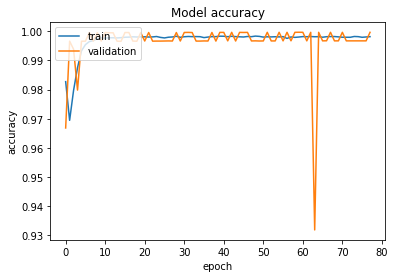

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["train", "validation"], loc = "upper left")